# 📘 Pré-processamento de Texto para NLP Clássico

Este notebook apresenta as principais etapas de pré-processamento de texto utilizadas em Processamento de Linguagem Natural (NLP Clássico), incluindo:

- Tokenização
- Remoção de stopwords e pontuação
- Stemming e Lemmatização
- Extração de n-gramas (bigramas)
- Visualização com WordCloud


## 🔧 Imports e configurações iniciais

In [11]:
import nltk
import spacy
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import CountVectorizer

### 📦 Baixar recursos necessários do NLTK

In [12]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\Jorge
[nltk_data]     Maques/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jorge
[nltk_data]     Maques/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Jorge
[nltk_data]     Maques/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Jorge
[nltk_data]     Maques/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### 🔧 Carregar modelo do spaCy	nlp = spacy.load("en_core_web_sm")

In [13]:
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    import spacy.cli
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

### 📄 Texto de exemplo

In [14]:
texto = """
Processamento de Linguagem Natural (PLN) é uma subárea da inteligência artificial que se concentra na interação entre computadores e humanos por meio da linguagem natural.
"""

### 🔹 1. Tokenização com NLTK (usando TreebankWordTokenizer)

A **tokenização** é o processo de dividir o texto em unidades menores chamadas tokens, que geralmente são palavras ou pontuações.

- Com **NLTK**, usamos o `TreebankWordTokenizer`, que oferece uma segmentação semelhante à do Penn Treebank.
- Com **spaCy**, usamos o modelo de linguagem inglês `en_core_web_sm`, ignorando tokens de espaço em branco.


In [15]:
print("\n🔹 Tokenização com NLTK:")
tokenizer = TreebankWordTokenizer()
tokens_nltk = tokenizer.tokenize(texto)
print(tokens_nltk)


🔹 Tokenização com NLTK:
['Processamento', 'de', 'Linguagem', 'Natural', '(', 'PLN', ')', 'é', 'uma', 'subárea', 'da', 'inteligência', 'artificial', 'que', 'se', 'concentra', 'na', 'interação', 'entre', 'computadores', 'e', 'humanos', 'por', 'meio', 'da', 'linguagem', 'natural', '.']


### 🧹 Remoção de Stopwords e Pontuação

**Stopwords** são palavras comuns que geralmente não trazem significado importante (ex: "the", "is", "and").

Removemos:
- Stopwords usando a lista do NLTK
- Pontuações usando `string.punctuation`


In [16]:
stop_words = set(stopwords.words('english'))
tokens_filtrados = [
    word.lower() for word in tokens_nltk 
    if word.lower() not in stop_words and word not in string.punctuation
]
print("\n🔹 Após remoção de stopwords e pontuação:")
print(tokens_filtrados)


🔹 Após remoção de stopwords e pontuação:
['processamento', 'de', 'linguagem', 'natural', 'pln', 'é', 'uma', 'subárea', 'da', 'inteligência', 'artificial', 'que', 'se', 'concentra', 'na', 'interação', 'entre', 'computadores', 'e', 'humanos', 'por', 'meio', 'da', 'linguagem', 'natural']


### 🌱 Stemming

O **Stemming** reduz as palavras aos seus radicais (ex: "running" → "run") sem se preocupar com a forma correta da palavra. Utilizamos o `PorterStemmer`, um dos algoritmos mais populares.


In [17]:
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in tokens_filtrados]
print("\n🔹 Stemming com PorterStemmer:")
print(stems)


🔹 Stemming com PorterStemmer:
['processamento', 'de', 'linguagem', 'natur', 'pln', 'é', 'uma', 'subárea', 'da', 'inteligência', 'artifici', 'que', 'se', 'concentra', 'na', 'interação', 'entr', 'computador', 'e', 'humano', 'por', 'meio', 'da', 'linguagem', 'natur']


### 🍃 Lemmatização

A **lemmatização** também reduz palavras às suas formas básicas, mas considera o contexto e a gramática. Por exemplo, "better" → "good". Utilizamos o `WordNetLemmatizer`.


In [18]:
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word) for word in tokens_filtrados]
print("\n🔹 Lemmatização:")
print(lemmas)


🔹 Lemmatização:
['processamento', 'de', 'linguagem', 'natural', 'pln', 'é', 'uma', 'subárea', 'da', 'inteligência', 'artificial', 'que', 'se', 'concentra', 'na', 'interação', 'entre', 'computadores', 'e', 'humanos', 'por', 'meio', 'da', 'linguagem', 'natural']


### 🔗 Extração de N-gramas

**N-gramas** são combinações de N palavras consecutivas. Neste notebook, extraímos **bigramas** (pares de palavras) usando o `CountVectorizer` da biblioteca `sklearn`.


In [19]:
vectorizer = CountVectorizer(ngram_range=(2, 2))  # Bigramas
X = vectorizer.fit_transform([texto])
print("\n🔹 Bigramas encontrados:")
print(vectorizer.get_feature_names_out())


🔹 Bigramas encontrados:
['artificial que' 'computadores humanos' 'concentra na' 'da inteligência'
 'da linguagem' 'de linguagem' 'entre computadores' 'humanos por'
 'inteligência artificial' 'interação entre' 'linguagem natural' 'meio da'
 'na interação' 'natural pln' 'pln uma' 'por meio' 'processamento de'
 'que se' 'se concentra' 'subárea da' 'uma subárea']


### ☁️ WordCloud

Por fim, geramos uma **nuvem de palavras** com as palavras resultantes após o pré-processamento, visualizando os termos mais relevantes do texto de forma gráfica.


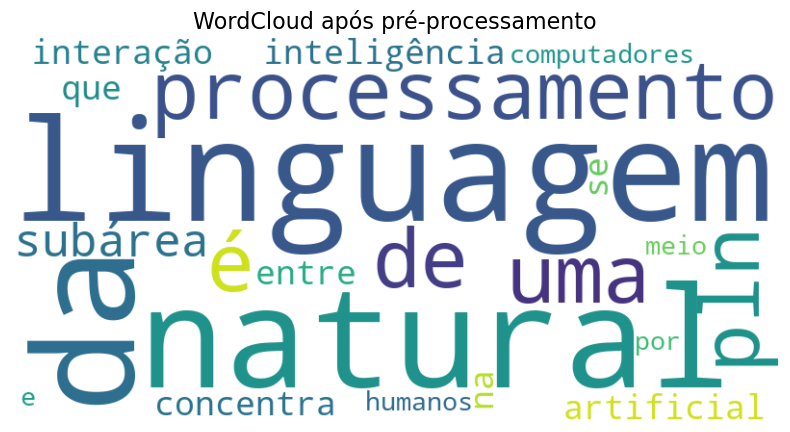

In [20]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens_filtrados))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud após pré-processamento", fontsize=16)
plt.show()

## ✅ Conclusão

Neste notebook, exploramos as principais etapas de pré-processamento de texto em NLP (Processamento de Linguagem Natural). A partir de um texto bruto, aplicamos uma sequência de transformações para preparar os dados para análises e modelos de machine learning.

As etapas realizadas foram:

- **Tokenização**: Quebra do texto em palavras ou tokens menores.
- **Remoção de Stopwords e Pontuação**: Eliminação de palavras comuns e sinais sem significado relevante.
- **Stemming**: Redução das palavras à sua raiz morfológica.
- **Lemmatização**: Transformação das palavras em sua forma canônica.
- **Extração de N-gramas**: Identificação de padrões de palavras consecutivas para capturar contexto local.

Cada uma dessas etapas tem vantagens e limitações, e sua aplicação depende dos objetivos da tarefa de NLP. Em geral, esse pipeline de pré-processamento é fundamental para representar o texto de forma estruturada e significativa, facilitando sua utilização em modelos de classificação, análise de sentimentos, clustering e outros.
